<a href="https://colab.research.google.com/github/abhishk0403/Customer_Engagement_Project/blob/main/workation_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The new covid-era has provided a new way of living the work-life balance. We have seen a lot of different websites providing packages to work from different locations. From Kashmir to Kanyakumari, from Gujarat to Assam we have collected packages in and around India. It becomes really difficult to find the best place with all the amenities such as high-speed internet, a comfortable stay as well as within the budget. To solve the real-world problem of finding the best deals for a calm and enjoying workation trip. Workation is the best way to work at a remote location with a recreational and rejuvenating vacation for the team.

In this competition, one has to use the knowledge of machine learning, deep learning, and model building to predict the price per person for your next workstation trip. The data has more than 18000+ rows of different packages with the details like start location, hotel type, cost per person, destination, Itinerary, and many more.

In [3]:
import os

In [8]:
df = pd.read_csv("/content/Train.csv", on_bad_lines='skip')

In [9]:
df.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2.0,3.0,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0.0,5.0,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0.0,4.0,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0.0,5.0,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0.0,5.0,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
df.shape

(20975, 15)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20975 entries, 0 to 20974
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Uniq Id                     20975 non-null  object 
 1   Package Name                20975 non-null  object 
 2   Package Type                20975 non-null  object 
 3   Destination                 20974 non-null  object 
 4   Itinerary                   20973 non-null  object 
 5   Places Covered              20973 non-null  object 
 6   Travel Date                 20972 non-null  object 
 7   Hotel Details               20972 non-null  object 
 8   Start City                  20972 non-null  object 
 9   Airline                     20971 non-null  object 
 10  Flight Stops                20970 non-null  float64
 11  Meals                       20969 non-null  float64
 12  Sightseeing Places Covered  20969 non-null  object 
 13  Cancellation Rules          209

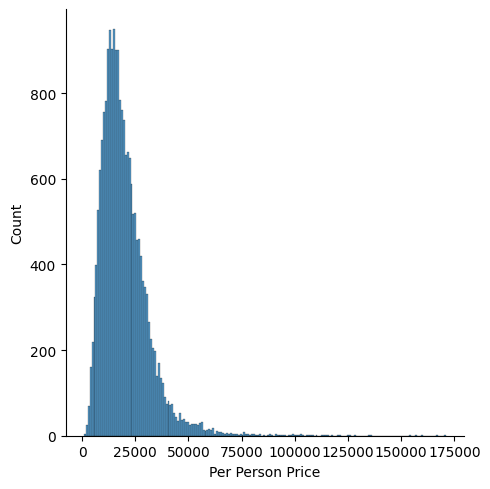

In [16]:
###### check the target variable......
sns.displot(x="Per Person Price", data=df)
plt.show()

In [20]:
df["Per Person Price"].describe()

,Per Person Price
count,20968.000000
mean,20059.107545
std,11642.048760
min,791.000000
25%,12461.000000
50%,17766.000000
75%,25084.125000
max,171062.500000


In [22]:
import datetime
df["Travel Date"] = pd.to_datetime(df["Travel Date"])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20975 entries, 0 to 20974
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Uniq Id                     20975 non-null  object        
 1   Package Name                20975 non-null  object        
 2   Package Type                20975 non-null  object        
 3   Destination                 20974 non-null  object        
 4   Itinerary                   20973 non-null  object        
 5   Places Covered              20973 non-null  object        
 6   Travel Date                 20972 non-null  datetime64[ns]
 7   Hotel Details               20972 non-null  object        
 8   Start City                  20972 non-null  object        
 9   Airline                     20971 non-null  object        
 10  Flight Stops                20970 non-null  float64       
 11  Meals                       20969 non-null  float64   

In [26]:
# Extract the Date and month
df["month"]=df.loc[:,"Travel Date"].dt.month

In [27]:
# Extract the Date and month
df["day"]=df.loc[:,"Travel Date"].dt.day

In [28]:
# Extract the Date and month
df["year"]=df.loc[:,"Travel Date"].dt.year

In [30]:
df["year"].unique()

array([2021., 2022.,   nan])

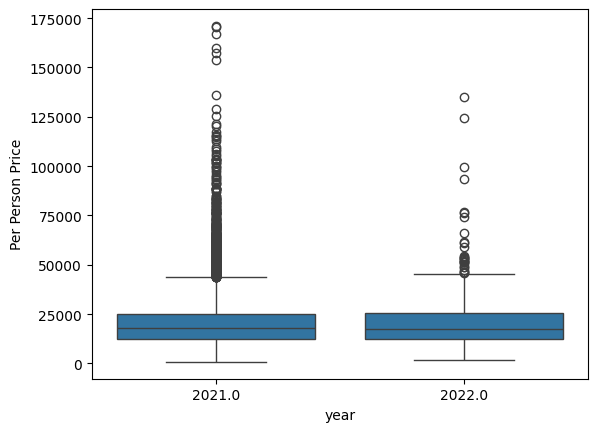

In [31]:
# Year vs Target

sns.boxplot(x="year", y="Per Person Price", data=df)
plt.show()

# 2021 since covid began and this was a delta wave.. people migrated to other locations
# hence high spent
## In 2022, the covid started settling down and spent was less

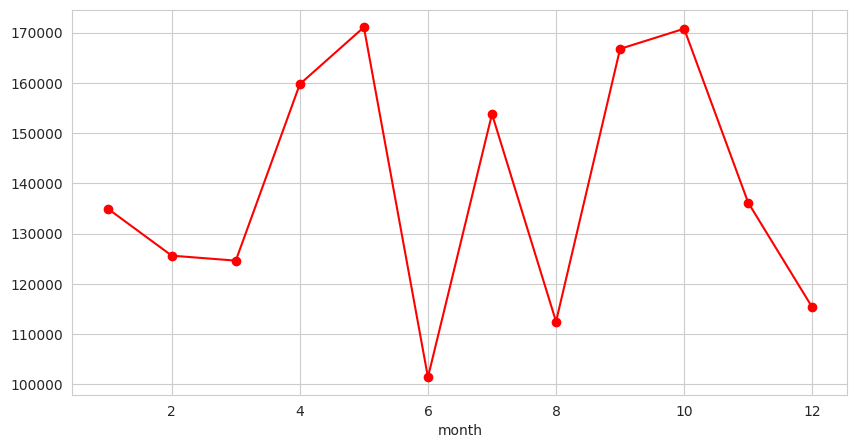

In [47]:
# analyse month
sns.set_style("whitegrid")
month_wise_spent=df.groupby("month")["Per Person Price"].max()
month_wise_spent.plot(kind="line",figsize=(10,5),style="o-",color="red")
plt.show()

In [48]:
# peak spending month vs low spending month
peak=[4,5,7,9,10]
df["peak_months"]=df.loc[:,"month"].apply(lambda x:"Peak_month" if x in peak else "Normal")

In [49]:
df.groupby("peak_months")["Per Person Price"].describe()

,count,mean,std,min,25%,50%,75%,max
peak_months,,,,,,,,
Normal,11017.0,20002.122039,11432.024006,791.0,12417.50,17761.0,24976.5,136155.5
Peak_month,9951.0,20122.197618,11870.495539,1225.0,12507.75,17780.5,25162.5,171062.5


In [52]:
# check the statistical test .....
# H0: there is no difference between the spend on the worktation trips
# H1: That the people spend in peak months is higher thn the rest

# two sample independent t test

normal=df.loc[df.peak_months=="Normal","Per Person Price"]
peak=df.loc[df.peak_months=="Peak_month","Per Person Price"]
peak.fillna(peak.mean(), inplace=True)
normal.fillna(normal.mean(), inplace=True)
stats.ttest_ind(normal,peak)


TtestResult(statistic=-0.7460145051335753, pvalue=0.4556670140894101, df=20973.0)

In [53]:
peak.isnull().sum()

0

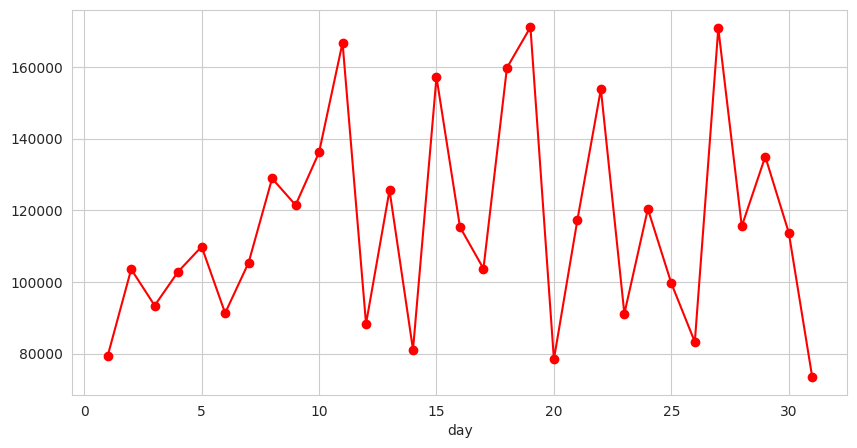

In [58]:
# analyse month
sns.set_style("whitegrid")
date_wise_spent=df.groupby("day")["Per Person Price"].max()
date_wise_spent.plot(kind="line",figsize=(10,5),style="o-",color="red")
plt.show()

In [59]:
peak=[2,4,5,7,8,10,11,13,15,18,19,21,22,24,27,29]
df["peak_days"]=df.loc[:,"day"].apply(lambda x:"Peak_days" if x in peak else "Normal_days")

In [60]:
normal=df.loc[df.peak_days=="Normal_days","Per Person Price"]
peak=df.loc[df.peak_days=="Peak_days","Per Person Price"]

In [62]:

peak.fillna(peak.mean(), inplace=True)
normal.fillna(normal.mean(), inplace=True)
stats.ttest_ind(normal,peak)

TtestResult(statistic=-0.21625874625520866, pvalue=0.8287881671012862, df=20973.0)

In [63]:
df.Destination[0]

'New Delhi|Shimla|Manali|Chandigarh'

In [ ]:
# total paces travelled... number of places travelled
df["total_places"]=df["Destination"].apply(lambda x:len(x.split("|")))

In [64]:
df["Destination"].apply(lambda x:len(x.split("|")))

AttributeError: 'float' object has no attribute 'split'

In [66]:
df["Des"]

'Cochin|Munnar|Thekkady|Allepey|Kovalam and Poovar'

In [69]:
def destination_remove_and(x):
  if isinstance(x, str): # Check if x is a string
    if "and" in x.lower():
      return len(x.replace(" and ","|").split("|"))
    else:
      return len(x.split("|"))
  else: # Handle non-string values (e.g., return 0 or a missing value indicator)
    return 0

df["Destination"]=df["Destination"].apply(destination_remove_and)

In [73]:
df.dropna(inplace=True)

In [75]:
df.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price', 'month', 'day', 'year',
       'peak_months', 'peak_days', 'Count_Airline'],
      dtype='object')

In [76]:
df["Count_Airline"]=df["Airline"].apply(destination_remove_and)
df["count_sightseeing places covered"]=df["Sightseeing Places Covered"].apply(destination_remove_and)

In [77]:
df.head(4)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,...,Sightseeing Places Covered,Cancellation Rules,Per Person Price,month,day,year,peak_months,peak_days,Count_Airline,count_sightseeing places covered
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,4,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,...,Not Available,Not Available,11509.0,7.0,30.0,2021.0,Peak_month,Normal_days,1,1
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,3,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,2021-12-08,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,...,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,12.0,8.0,2021.0,Normal,Peak_days,2,7
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,2,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,2021-04-26,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,...,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5,4.0,26.0,2021.0,Peak_month,Normal_days,1,8
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,5,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2021-08-27,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,...,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0,8.0,27.0,2021.0,Normal,Peak_days,1,9


In [79]:
def city(x):
  if x=="Delhi":
    return(1)
  else:
    return(0)
df["Start City"]=df["Start City"].apply(city)

In [82]:
for i in "1N New Delhi . 2N Shimla . 2N Manali . 1N Chandigarh":
  if i.isnumeric():
    print(i)

1
2
2
1


In [90]:
import re # Use regex

# expression as [0-9]

text = df.Itinerary[0]
np.sum(pd.to_numeric(re.findall("\d", text)))

6

In [91]:
df["Itinerary"]=df["Itinerary"].apply(lambda x:np.sum(pd.to_numeric(re.findall("\d", x))))

In [94]:
df["Itinerary"].mean()

4.73016024418161

In [97]:
df[df["Hotel Details"]=="Not Available"].shape

(2924, 22)

In [125]:
def convertx(text):
  if "One" in text:
    return (text.replace(":One","1")) # Removed inplace argument.
  if "Two" in text:
    return (text.replace(":Two","2")) # Removed inplace argument.
  if "Three" in text:
    return (text.replace(":Three","3")) # Removed inplace argument.
  if "Four" in text:
    return (text.replace(":Four","4")) # Removed inplace argument.
  else:
    return (text.replace(":Five","5")) # Removed inplace argument.

In [117]:
df["Hotel Details"]=df["Hotel Details"].apply(convertx)

In [123]:
df["Hotel Details"].unique()

array(['Not Available',
       'The Orchard Retreat & Spa:4.6|WelcomHotel Pine N Peak Pahalgam - Member ITC Hotel Group:4.1|The Orchard Retreat & Spa:4.6',
       'The Ananta:4.4|juSTa Lake Nahargarh Palace:4', ...,
       'Hotel The Royal Plaza:4.0|The Taj Vilas:4.0|Lemon Tree Premier Jaipur:4.5',
       'Club Mahindra Virajpet, Coorg:4|The Quorum:3.5|Hotel Meadows Residency:4.4',
       'Poppys Hotel4|Hyatt Place Rameswaram4|Vinayaga by Poppys3|Svatma4|Red Fox Hotel ,Trichy3|Kodai Resort Hotel4'],
      dtype=object)

In [127]:
text=df["Hotel Details"][8]
np.mean(pd.to_numeric(re.findall("[\d.\d]+", text)))

def ratings(text):
  return np.mean(pd.to_numeric(re.findall(r"[\d]+(?:\.[\d]+)?", text)))

df["Hotel Details"]=df["Hotel Details"].apply(ratings)

In [110]:
df["Hotel Details"][8]

'California Group of Houseboats:3.6|The Rosewood Hotel:3.4|The Chinar Resort & Spa:4.6|California Group of Houseboats:3.6'

In [128]:
df.head(2)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,...,Sightseeing Places Covered,Cancellation Rules,Per Person Price,month,day,year,peak_months,peak_days,Count_Airline,count_sightseeing places covered
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,4,6,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,NaN,0,Not Available,...,Not Available,Not Available,11509.0,7.0,30.0,2021.0,Peak_month,Normal_days,1,1
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,3,4,Srinagar|Pahalgam|Srinagar,2021-12-08,4.433333,0,IndiGo|IndiGo,...,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,12.0,8.0,2021.0,Normal,Peak_days,2,7


In [129]:
new_df=df.drop(columns=["Uniq Id","Places Covered","Travel Date","Hotel Details","Airline","Cancellation Rules"],axis=1)

In [130]:
new_df.head(5)

,Package Name,Package Type,Destination,Itinerary,Start City,Flight Stops,Meals,Sightseeing Places Covered,Per Person Price,month,day,year,peak_months,peak_days,Count_Airline,count_sightseeing places covered
0,Best of Shimla and Manali Holiday from Delhi,Standard,4,6,0,2.0,3.0,Not Available,11509.0,7.0,30.0,2021.0,Peak_month,Normal_days,1,1
1,Kashmir Valley vacation,Premium,3,4,0,0.0,5.0,Dal Lake | Avantipura Ruins | Mughal Gardens ...,22485.5,12.0,8.0,2021.0,Normal,Peak_days,2,7
2,Might of Mewar- Udaipur and Chittorgarh,Luxury,2,3,0,0.0,4.0,Lake Pichola | Jag Mandir Palace | Saheliyon ...,12421.5,4.0,26.0,2021.0,Peak_month,Normal_days,1,8
3,Colorful Kerala ( Romantic Getaway ),Premium,5,6,0,0.0,5.0,Mattupetty Dam | Echo Point | Tata Tea Museum...,35967.0,8.0,27.0,2021.0,Normal,Peak_days,1,9
4,A Week In Bangkok & Pattaya,Premium,2,7,0,0.0,5.0,"Coral Island Tour with Indian Lunch, Join Spe...",25584.0,12.0,12.0,2021.0,Normal,Normal_days,2,2


In [133]:
df["Package Name"].nunique()

2204